In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import re

In [2]:
datapath= './data/'

for folder in os.listdir(datapath):
    files = gb.glob(pathname=str(datapath+folder+"/*.jpeg")) + gb.glob(pathname=str(datapath+folder+"/*.jpg"))
    print(f'Data found {len(files)} in folder {folder}')

Data found 11 in folder Abdelrahman
Data found 10 in folder Ahmed
Data found 11 in folder Ibrahim
Data found 11 in folder Waleed


In [3]:
code={'Abdelrahman':0,'Ahmed':1,'Ibrahim':2,'Waleed':4}
def getcode(n):
    for z,f in code.items():
        if n == f:
            return z

In [4]:
size = []
for folder in os.listdir(datapath):
    files = gb.glob(pathname=str(datapath+folder+"/*.jpeg")) + gb.glob(pathname=str(datapath+folder+"/*.jpg"))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)

In [5]:
pd.Series(size).value_counts()

(2592, 1944, 3)    4
(3264, 2448, 3)    4
(1944, 2592, 3)    3
(304, 239, 3)      1
(820, 470, 3)      1
(291, 219, 3)      1
(360, 320, 3)      1
(310, 218, 3)      1
(319, 205, 3)      1
(1280, 717, 3)     1
(532, 436, 3)      1
(366, 215, 3)      1
(307, 171, 3)      1
(853, 553, 3)      1
(857, 859, 3)      1
(1280, 1267, 3)    1
(1152, 864, 3)     1
(235, 167, 3)      1
(1280, 856, 3)     1
(737, 758, 3)      1
(800, 264, 3)      1
(1211, 525, 3)     1
(1010, 1039, 3)    1
(925, 859, 3)      1
(2448, 3264, 3)    1
(1600, 1200, 3)    1
(638, 635, 3)      1
(3880, 5184, 3)    1
(2560, 1920, 3)    1
(960, 1280, 3)     1
(1280, 960, 3)     1
(2001, 2001, 3)    1
(893, 702, 3)      1
(446, 416, 3)      1
(464, 354, 3)      1
dtype: int64

In [32]:
s1 = gb.glob(str(datapath+'Abdelrahman/'+'/*.jpg'))

Image shape is (2592, 1944, 3)


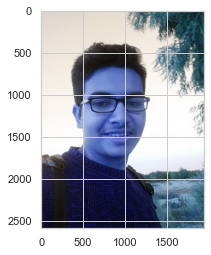

In [33]:
image1 = cv2.imread(s1[0])
print(f'Image shape is {image1.shape}')
plt.imshow(image1,cmap='gray')

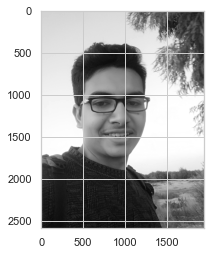

In [34]:
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [35]:
# Load haar cascade classifier
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

[[419 742 923 923]]


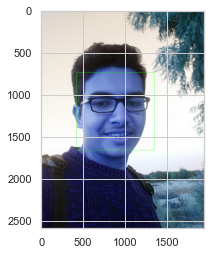

In [36]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

for x,y,w,h in faces:
    cv2.rectangle(image1,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(image1)

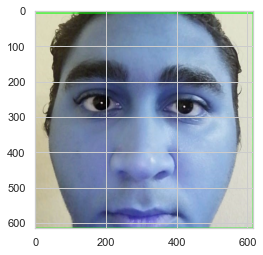

In [23]:
crop_img = image1[y:y+h,x:x+h]
plt.imshow(crop_img)

In [37]:
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def extract_faces(path,name,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+h]
        
    if name == "Abdelrahman":
        cv2.imwrite('./crop/Abdelrahman/{}_{}.png'.format(name,i),roi)
    elif name == "Ahmed":
        cv2.imwrite('./crop/Ahmed/{}_{}.png'.format(name,i),roi)
    elif name == "Ibrahim":
        cv2.imwrite('./crop/Ibrahim/{}_{}.png'.format(name,i),roi)
    elif name == "Waleed":
        cv2.imwrite('./crop/Waleed/{}_{}.png'.format(name,i),roi)
    

In [40]:
abdo_path = gb.glob('./data/Abdelrahman/*.jpg')
waleed_path = gb.glob('./data/Waleed/*.jpeg')
ahmed_path = gb.glob('./data/Ahmed/*.jpg')
ibrahim_path  = gb.glob('./data/Ibrahim/*.jpeg')
# extract_faces(abdo_path[0],'Abdelrahman',1)

In [41]:
# Ahmed
for i,path in enumerate(ahmed_path):
    try:
        extract_faces(path,'Ahmed',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(ahmed_path)))
    except:
        print('INFO: {}/{} not processed '.format(i,len(ahmed_path)))

INFO: 0/10 processed sucessfully
INFO: 1/10 processed sucessfully
INFO: 2/10 processed sucessfully
INFO: 3/10 processed sucessfully
INFO: 4/10 processed sucessfully
INFO: 5/10 not processed 
INFO: 6/10 processed sucessfully
INFO: 7/10 processed sucessfully
INFO: 8/10 not processed 
INFO: 9/10 not processed 


In [42]:
# Abelrahman
for i,path in enumerate(abdo_path):
    try:
        extract_faces(path,'Abdelrahman',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(abdo_path)))
    except:
        print('INFO: {}/{} not processed '.format(i,len(abdo_path)))

INFO: 0/11 processed sucessfully
INFO: 1/11 processed sucessfully
INFO: 2/11 not processed 
INFO: 3/11 processed sucessfully
INFO: 4/11 processed sucessfully
INFO: 5/11 processed sucessfully
INFO: 6/11 processed sucessfully
INFO: 7/11 processed sucessfully
INFO: 8/11 processed sucessfully
INFO: 9/11 processed sucessfully
INFO: 10/11 processed sucessfully


In [43]:
#Waleed
for i,path in enumerate(waleed_path):
    try:
        extract_faces(path,'Waleed',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(waleed_path)))
    except:
        print('INFO: {}/{} not processed '.format(i,len(waleed_path)))

INFO: 0/11 processed sucessfully
INFO: 1/11 processed sucessfully
INFO: 2/11 processed sucessfully
INFO: 3/11 processed sucessfully
INFO: 4/11 processed sucessfully
INFO: 5/11 processed sucessfully
INFO: 6/11 processed sucessfully
INFO: 7/11 not processed 
INFO: 8/11 processed sucessfully
INFO: 9/11 processed sucessfully
INFO: 10/11 processed sucessfully


In [44]:
# Ibrahim
for i,path in enumerate(ibrahim_path):
    try:
        extract_faces(path,'Ibrahim',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(ibrahim_path)))
    except:
        print('INFO: {}/{} not processed '.format(i,len(ibrahim_path)))

INFO: 0/11 processed sucessfully
INFO: 1/11 processed sucessfully
INFO: 2/11 processed sucessfully
INFO: 3/11 processed sucessfully
INFO: 4/11 processed sucessfully
INFO: 5/11 processed sucessfully
INFO: 6/11 processed sucessfully
INFO: 7/11 processed sucessfully
INFO: 8/11 processed sucessfully
INFO: 9/11 processed sucessfully
INFO: 10/11 not processed 


In [3]:
Ahmed = gb.glob('./crop/Ahmed_crop/*.png') + gb.glob('./crop/Ahmed_crop/*.jpg')
Abdo = gb.glob('./crop/Abdelrahman_crop/*.png')
waleed = gb.glob('./crop/Waleed_crop/*.png')
ibrahim = gb.glob('./crop/Ibrahim_crop/*.png')

In [4]:
path = Ahmed + Abdo + waleed + ibrahim

In [5]:
# getting size of image
from PIL import Image
def get_size(path):
    img = Image.open(path)
    return img.size

In [6]:
# Create Dataframe 
df = pd.DataFrame(data = path, columns=['path'])
df

,path
0,./crop/Ahmed_crop\Ahmed_0.png
1,./crop/Ahmed_crop\Ahmed_1.png
2,./crop/Ahmed_crop\Ahmed_10.png
3,./crop/Ahmed_crop\Ahmed_11.png
4,./crop/Ahmed_crop\Ahmed_12.png
...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png
72,./crop/Ibrahim_crop\Ibrahim_6.png
73,./crop/Ibrahim_crop\Ibrahim_7.png
74,./crop/Ibrahim_crop\Ibrahim_8.png


In [7]:
df.shape

(76, 1)

In [8]:
df['size'] = df['path'].apply(get_size)
df

,path,size
0,./crop/Ahmed_crop\Ahmed_0.png,"(182, 182)"
1,./crop/Ahmed_crop\Ahmed_1.png,"(1384, 1384)"
2,./crop/Ahmed_crop\Ahmed_10.png,"(182, 182)"
3,./crop/Ahmed_crop\Ahmed_11.png,"(1384, 1384)"
4,./crop/Ahmed_crop\Ahmed_12.png,"(401, 591)"
...,...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png,"(410, 410)"
72,./crop/Ibrahim_crop\Ibrahim_6.png,"(182, 182)"
73,./crop/Ibrahim_crop\Ibrahim_7.png,"(410, 410)"
74,./crop/Ibrahim_crop\Ibrahim_8.png,"(273, 273)"


In [9]:
df_new = df
df_new

,path,size
0,./crop/Ahmed_crop\Ahmed_0.png,"(182, 182)"
1,./crop/Ahmed_crop\Ahmed_1.png,"(1384, 1384)"
2,./crop/Ahmed_crop\Ahmed_10.png,"(182, 182)"
3,./crop/Ahmed_crop\Ahmed_11.png,"(1384, 1384)"
4,./crop/Ahmed_crop\Ahmed_12.png,"(401, 591)"
...,...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png,"(410, 410)"
72,./crop/Ibrahim_crop\Ibrahim_6.png,"(182, 182)"
73,./crop/Ibrahim_crop\Ibrahim_7.png,"(410, 410)"
74,./crop/Ibrahim_crop\Ibrahim_8.png,"(273, 273)"


In [10]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None
    
# gender(string)
df['name'] = df['path'].apply(gender)
df

,path,size,name
0,./crop/Ahmed_crop\Ahmed_0.png,"(182, 182)",Ahmed
1,./crop/Ahmed_crop\Ahmed_1.png,"(1384, 1384)",Ahmed
2,./crop/Ahmed_crop\Ahmed_10.png,"(182, 182)",Ahmed
3,./crop/Ahmed_crop\Ahmed_11.png,"(1384, 1384)",Ahmed
4,./crop/Ahmed_crop\Ahmed_12.png,"(401, 591)",Ahmed
...,...,...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png,"(410, 410)",Ibrahim
72,./crop/Ibrahim_crop\Ibrahim_6.png,"(182, 182)",Ibrahim
73,./crop/Ibrahim_crop\Ibrahim_7.png,"(410, 410)",Ibrahim
74,./crop/Ibrahim_crop\Ibrahim_8.png,"(273, 273)",Ibrahim


Waleed         0.263158
Ibrahim        0.263158
Ahmed          0.236842
Abdelrahman    0.236842
Name: name, dtype: float64


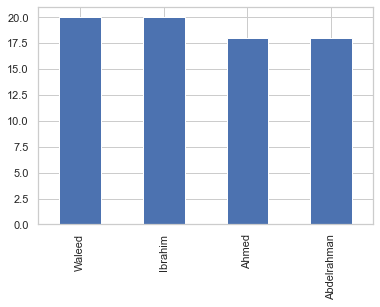

In [11]:
print(df['name'].value_counts(normalize=True))
df['name'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:ylabel='name'>

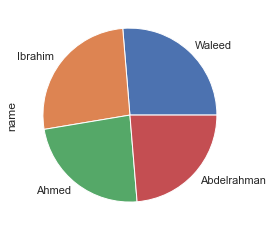

In [12]:
df['name'].value_counts().plot(kind='pie')

In [13]:
def resize_image(path_to_resize): 
    try:
        #step 1: Read the image
        img = cv2.imread(path_to_resize)

        #Step 2: Convert to grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        #Step 3: resize into 100x100 array
        size = gray.shape[0]
        if size > 100 : # shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # shrinking
        else: #enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # Enlarge

        #step 4: Flatten Image (1x10,000)
        return gray_re.flatten()
    except:
        return None

In [14]:
resize_image(path[0])

array([125, 138, 143, ...,  49,  36,  31], dtype=uint8)

In [15]:
len(resize_image(path[0]))

10000

In [16]:
df_new

,path,size,name
0,./crop/Ahmed_crop\Ahmed_0.png,"(182, 182)",Ahmed
1,./crop/Ahmed_crop\Ahmed_1.png,"(1384, 1384)",Ahmed
2,./crop/Ahmed_crop\Ahmed_10.png,"(182, 182)",Ahmed
3,./crop/Ahmed_crop\Ahmed_11.png,"(1384, 1384)",Ahmed
4,./crop/Ahmed_crop\Ahmed_12.png,"(401, 591)",Ahmed
...,...,...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png,"(410, 410)",Ibrahim
72,./crop/Ibrahim_crop\Ibrahim_6.png,"(182, 182)",Ibrahim
73,./crop/Ibrahim_crop\Ibrahim_7.png,"(410, 410)",Ibrahim
74,./crop/Ibrahim_crop\Ibrahim_8.png,"(273, 273)",Ibrahim


In [17]:
# Structuring Function
df_new['structured_data'] = df['path'].apply(resize_image)
df_new

,path,size,name,structured_data
0,./crop/Ahmed_crop\Ahmed_0.png,"(182, 182)",Ahmed,"[125, 138, 143, 109, 79, 80, 58, 43, 51, 51, 7..."
1,./crop/Ahmed_crop\Ahmed_1.png,"(1384, 1384)",Ahmed,"[202, 207, 210, 210, 205, 151, 210, 208, 212, ..."
2,./crop/Ahmed_crop\Ahmed_10.png,"(182, 182)",Ahmed,"[24, 24, 24, 24, 24, 24, 29, 83, 123, 145, 139..."
3,./crop/Ahmed_crop\Ahmed_11.png,"(1384, 1384)",Ahmed,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,./crop/Ahmed_crop\Ahmed_12.png,"(401, 591)",Ahmed,"[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 3..."
...,...,...,...,...
71,./crop/Ibrahim_crop\Ibrahim_5.png,"(410, 410)",Ibrahim,"[22, 29, 29, 26, 26, 26, 24, 27, 27, 29, 32, 3..."
72,./crop/Ibrahim_crop\Ibrahim_6.png,"(182, 182)",Ibrahim,"[147, 160, 137, 64, 30, 30, 33, 25, 32, 32, 32..."
73,./crop/Ibrahim_crop\Ibrahim_7.png,"(410, 410)",Ibrahim,"[217, 213, 227, 144, 129, 217, 194, 149, 250, ..."
74,./crop/Ibrahim_crop\Ibrahim_8.png,"(273, 273)",Ibrahim,"[64, 66, 65, 61, 75, 110, 127, 138, 141, 134, ..."


In [18]:
# copy and expand their columns
df1 = df_new['structured_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,125,138,143,109,79,80,58,43,51,51,...,58,60,58,56,60,58,57,49,36,31
1,202,207,210,210,205,151,210,208,212,216,...,0,0,0,0,0,0,0,0,0,0
2,24,24,24,24,24,24,29,83,123,145,...,43,40,38,25,24,24,24,24,24,24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,22,29,29,26,26,26,24,27,27,29,...,202,200,200,201,200,201,201,201,202,202
72,147,160,137,64,30,30,33,25,32,32,...,208,208,208,209,209,210,207,207,202,195
73,217,213,227,144,129,217,194,149,250,192,...,23,17,32,23,23,20,24,55,79,87
74,64,66,65,61,75,110,127,138,141,134,...,108,113,101,81,74,77,82,71,60,61


In [19]:
df2 = pd.concat((df_new['name'],df1),axis = 1)
df2.head()

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Ahmed,125,138,143,109,79,80,58,43,51,...,58,60,58,56,60,58,57,49,36,31
1,Ahmed,202,207,210,210,205,151,210,208,212,...,0,0,0,0,0,0,0,0,0,0
2,Ahmed,24,24,24,24,24,24,29,83,123,...,43,40,38,25,24,24,24,24,24,24
3,Ahmed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ahmed,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


Text(0.5, 1.0, 'Ahmed')

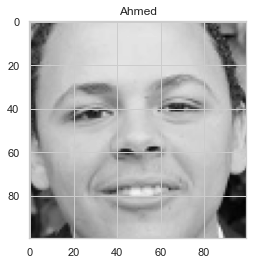

In [20]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title(df2.loc[0]['name'])

In [21]:
import pickle
pickle.dump(df2,open('./crop/dataframe_images.pickle','wb'))

# Normalization

In [22]:
# Load pickle data
df = pickle.load(open('./crop/dataframe_images.pickle','rb'))
df

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Ahmed,125,138,143,109,79,80,58,43,51,...,58,60,58,56,60,58,57,49,36,31
1,Ahmed,202,207,210,210,205,151,210,208,212,...,0,0,0,0,0,0,0,0,0,0
2,Ahmed,24,24,24,24,24,24,29,83,123,...,43,40,38,25,24,24,24,24,24,24
3,Ahmed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ahmed,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Ibrahim,22,29,29,26,26,26,24,27,27,...,202,200,200,201,200,201,201,201,202,202
72,Ibrahim,147,160,137,64,30,30,33,25,32,...,208,208,208,209,209,210,207,207,202,195
73,Ibrahim,217,213,227,144,129,217,194,149,250,...,23,17,32,23,23,20,24,55,79,87
74,Ibrahim,64,66,65,61,75,110,127,138,141,...,108,113,101,81,74,77,82,71,60,61


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 10001 entries, name to 9999
dtypes: object(1), uint8(10000)
memory usage: 742.9+ KB


In [24]:
df.isnull().sum()

name    0
0       0
1       0
2       0
3       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10001, dtype: int64

In [25]:
# split the data
X = df.iloc[:,1:].values # independent features
y = df.iloc[:,0].values # dependent

In [26]:
X.shape

(76, 10000)

In [27]:
# Min Max scaling
Xnorm = X / X.max()

In [28]:
Xnorm

array([[0.49019608, 0.54117647, 0.56078431, ..., 0.19215686, 0.14117647,
        0.12156863],
       [0.79215686, 0.81176471, 0.82352941, ..., 0.        , 0.        ,
        0.        ],
       [0.09411765, 0.09411765, 0.09411765, ..., 0.09411765, 0.09411765,
        0.09411765],
       ...,
       [0.85098039, 0.83529412, 0.89019608, ..., 0.21568627, 0.30980392,
        0.34117647],
       [0.25098039, 0.25882353, 0.25490196, ..., 0.27843137, 0.23529412,
        0.23921569],
       [0.8       , 0.81176471, 0.81176471, ..., 0.7254902 , 0.72941176,
        0.70196078]])

In [29]:
y

array(['Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed',
       'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed',
       'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim'], dtype=object)

In [30]:
for i in range(len(y)):
    if y[i] == 'Ahmed':
        y[i] = 1
    elif y[i] == 'Abdelrahman':
        y[i] = 0
    elif y[i] == 'Waleed':
        y[i] = 3
    elif y[i] == 'Ibrahim':
        y[i] = 2

In [31]:
y_norm = y
y_norm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [32]:
# saving Xnorm and y_norm
np.savez('./crop/data_notmalized',Xnorm,y_norm)

In [33]:
np.savez('./crop/data_not_notmalized',X,y)